# | Churn classifying predictions | 

## 1. Installing and importing libraries

### 1.1 Installing

In [1]:
''' Only execute (each line y commentless distinct cells) if libraries are not already installed '''

# pip install numpy
# pip install pandas
# pip install sklearn
# pip install category_encoders
# pip install matplotlib
# pip install seaborn

' Only execute (each line y commentless distinct cells) if libraries are not already installed '

### 1.2 importing

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt     
import seaborn as sns               

plt.style.use('ggplot')

from sklearn.tree import DecisionTreeClassifier     

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import classification_report, f1_score, confusion_matrix, roc_curve, auc      

## 2. Exploratory data analysis

In [3]:
# Creating the dataframe that contains the provided data:
df_name = "churn_all.csv" 
df = pd.read_csv(df_name)
df.sample(10)                           # Taking a look at the dataframe.

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
916,WY,415,373-2339,no,no,0,102.8,74,17.48,281.7,125,23.94,228.1,113,10.26,13.2,5,3.56,2,False
427,NH,415,355-1113,no,yes,40,104.9,65,17.83,216.3,93,18.39,217.4,128,9.78,9.6,9,2.59,1,False
4514,CT,510,377-9636,no,no,0,192.8,98,32.78,273.2,125,23.22,266.3,102,11.98,11.4,6,3.08,2,False
2076,NH,408,400-8538,yes,no,0,228.9,134,38.91,255.7,71,21.73,208.0,120,9.36,10.1,2,2.73,4,True
940,DE,415,417-2716,no,no,0,168.8,137,28.70,241.4,107,20.52,204.8,106,9.22,15.5,4,4.19,0,False
2759,IN,408,334-9818,no,no,0,115.6,129,19.65,167.8,104,14.26,141.8,124,6.38,12.6,9,3.40,1,False
2059,KS,408,379-7215,no,no,0,269.2,104,45.76,193.8,144,16.47,257.6,61,11.59,8.9,2,2.40,3,True
4597,OR,408,393-8963,yes,no,0,54.8,74,9.32,239.8,93,20.38,214.4,91,9.65,13.4,5,3.62,1,True
2478,TN,415,415-3016,no,yes,34,305.2,80,51.88,156.5,109,13.30,280.0,81,12.60,13.2,7,3.56,1,False
364,OK,408,328-9869,no,no,0,162.3,88,27.59,213.7,118,18.16,192.1,81,8.64,10.9,2,2.94,0,False


In [4]:
df.shape    # Let's see how much info we have. Only 5k rows. We may lack some information for the models to work correctly and we definitely can not get a validation set.

(5000, 20)

In [5]:
df.dtypes   # We check that data types make sense

state                             object
area_code                          int64
phone_number                      object
international_plan                object
voice_mail_plan                   object
number_vmail_messages              int64
total_day_minutes                float64
total_day_calls                    int64
total_day_charge                 float64
total_eve_minutes                float64
total_eve_calls                    int64
total_eve_charge                 float64
total_night_minutes              float64
total_night_calls                  int64
total_night_charge               float64
total_intl_minutes               float64
total_intl_calls                   int64
total_intl_charge                float64
number_customer_service_calls      int64
Churn                               bool
dtype: object

The variables that apparently may have more weight when it comes to supporting a customer withdrawal, logically, will be related to the cost of the service.

We rely on the variables *total_day_charge* , *total_eve_charge* , *total_intr_charge* and *total_intl_charge*.

Another reason for canceling any service is its disuse, so we must look at the consumption made by customers. That is, we investigate the variables
whose tag ends in *_calls* and *_minutes*.

The *state* and *area_code* variables could be used to find a correlation between the customer's geographic location and their type of consumption or their predisposition to request cancellation.

Likewise, the variables associated with the type of plan that clients have contracted and their calls to the customer service could also be indicators of one or another predisposition.
as to whether to stay in the service or leave.


We are going to make some graphs to collect evidence of how these variables influence. On the other hand, in order to predict a customer's cancellation, the *phone_number* variable does not provide any information (it acts as a simple user identifier) ​​so we can drop its associated column in the data frame.

### 2.1 Analysing morning data

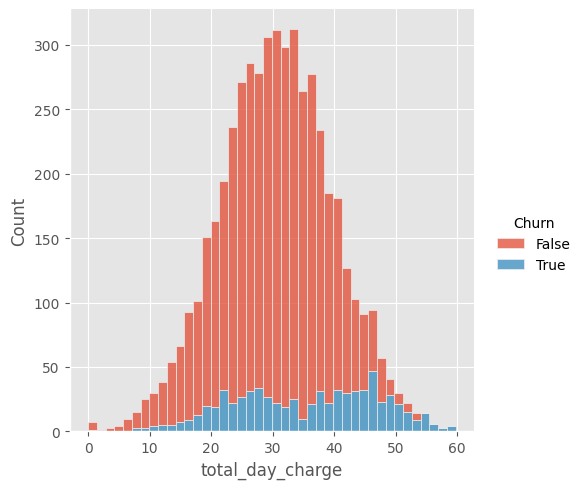

In [6]:
''' Graphics: total_day_charge  '''

sns.displot(data=df, x = 'total_day_charge', hue='Churn', multiple='stack');

We can see that most leaves occur when the charge for calls during the day is between 18-33$ and 37-48$.

We should pay special attention to the ones that are cahrged 42-60$ because the probability of leaving the service is the highest there (according to these charges).

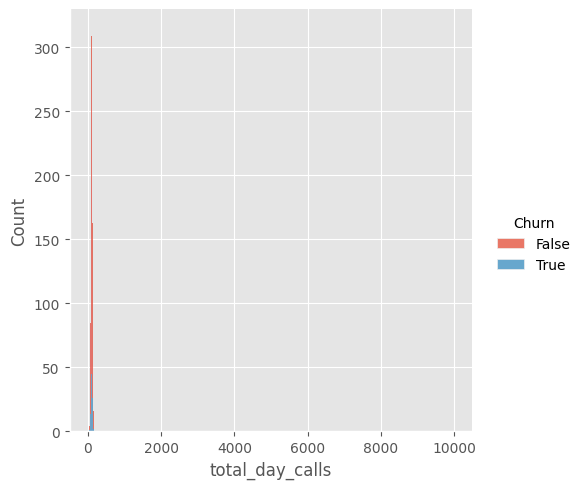

In [7]:
''' Graphics: total_day_calls  '''

sns.displot(data=df, x = 'total_day_calls', hue='Churn', multiple='stack');     # Here we notice that there are extreme values

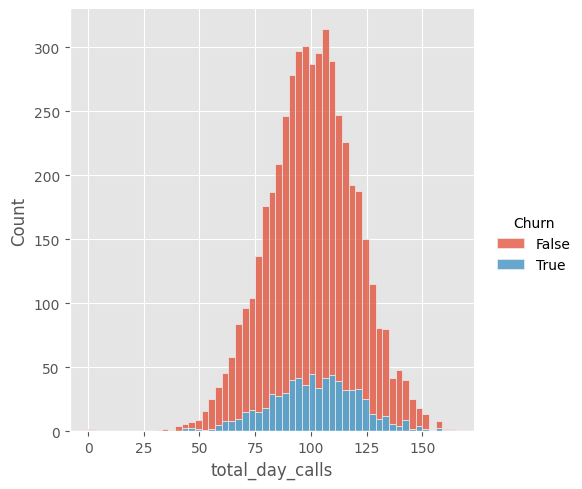

In [8]:
''' Graphics: total_day_calls  '''

sns.displot(data=df[df['total_day_calls'] < 1000], x = 'total_day_calls', hue='Churn', multiple='stack');       # We leave them out of the graphic

In [9]:
df[df['total_day_calls'] >= 1000].shape     # We only have 10 extreme values

(10, 20)

From here we could say that the customers who call the most and the less during the day are prone to stay in the service, whereas intermidiate users account for the greatest number of leaves.

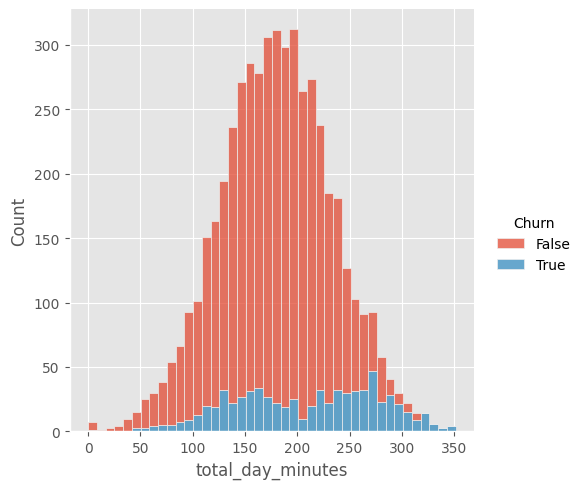

In [10]:
''' Graphics: total_day_minutes  '''

sns.displot(data=df, x = 'total_day_minutes', hue='Churn', multiple='stack');     

As we can see, the customers that reach 100 to 270 minutes of calls account for the greatest number of leaves, but there is a smaller amount of leaves coming from the customers calling for +270 minutes that are leaving with a really big (> 0.7) probability if not 1.

### 2.2 Analysing evening data

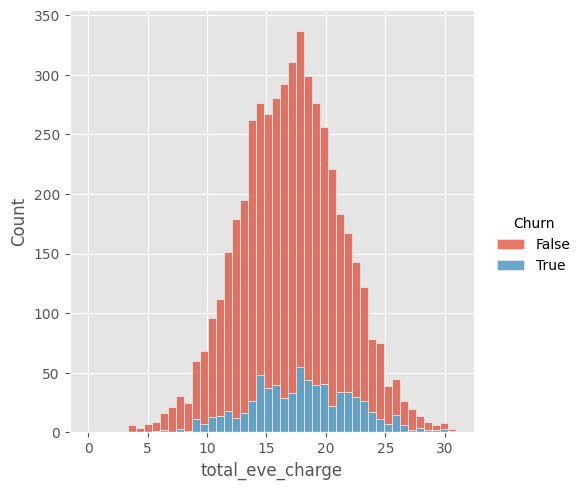

In [11]:
''' Graphics: total_eve_charge  '''

sns.displot(data=df, x = 'total_eve_charge', hue='Churn', multiple='stack');

Restricting ourselves to the evening charges, the number of leaves concentrates among the 9-27$ charge interval.

We can also tell that in general, charges in the afternoon are way lower than in the morning.

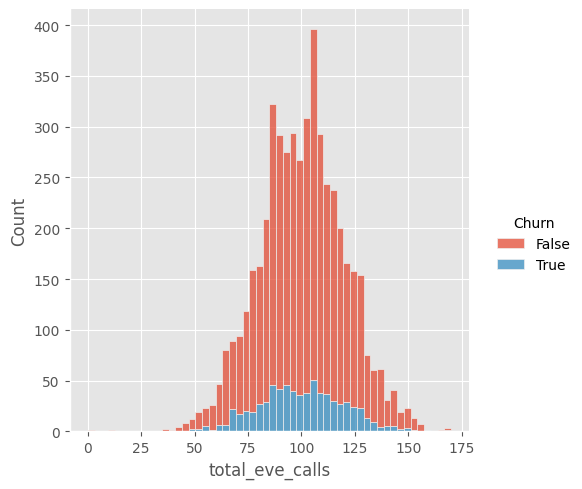

In [12]:
''' Graphics: total_eve_calls  '''

sns.displot(data=df, x = 'total_eve_calls', hue='Churn', multiple='stack');    

Customers that make an intermediate number of evening calls account for >90% of leaves.

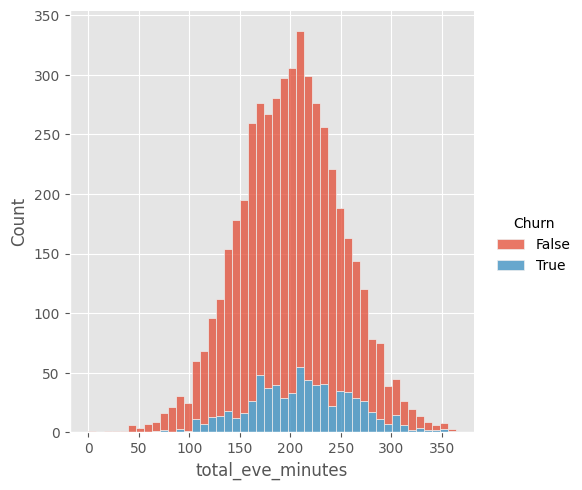

In [13]:
''' Graphics: total_eve_minutes  '''

sns.displot(data=df, x = 'total_eve_minutes', hue='Churn', multiple='stack');     

Customers that make 100 - 310 minutes calling during the evening accumulate most of the leaves

### 2.3 Analysing night data

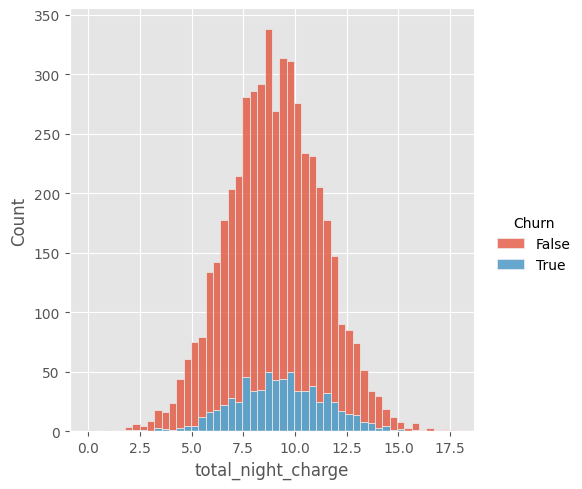

In [14]:
''' Graphics: total_night_charge  '''

sns.displot(data=df, x = 'total_night_charge', hue='Churn', multiple='stack');

Customers taht are charged the most and the less during the night are expected to stay whit high probabilities, but among the intermedaite charges we can find almost all the leaves, with probabilities reaching 15% in some cases

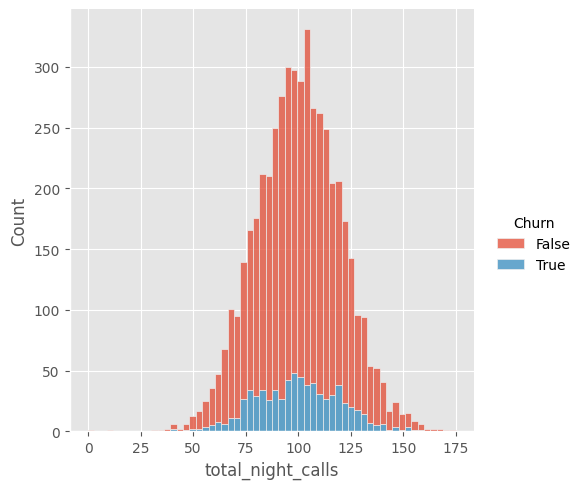

In [15]:
''' Graphics: total_night_calls  '''

sns.displot(data=df, x = 'total_night_calls', hue='Churn', multiple='stack');  

Most leaves are from customers that make an intermedaite number of calls (60 - 130) during the night, with probabilities up to 15%.

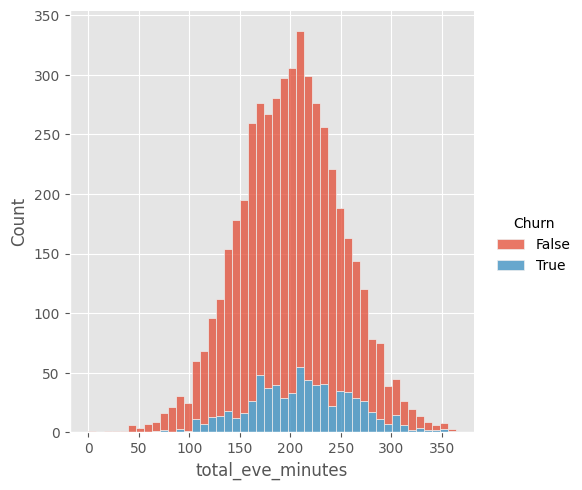

In [16]:
''' Graphics: total_eve_minutes  '''

sns.displot(data=df, x = 'total_eve_minutes', hue='Churn', multiple='stack');   

The distribution of the leaves is very similar (regarding intermediate and extreme values) to the one for the number of evening calls.

### 2.4 Analysing the *state* variable

In [17]:
df['state'].value_counts(dropna=False)  # How many states are there?

state
WV    158
MN    125
AL    124
ID    119
VA    118
OH    116
TX    116
WY    115
NY    114
OR    114
NJ    112
UT    112
WI    106
MI    103
ME    103
MA    103
MD    102
VT    101
MT     99
RI     99
KY     99
MS     99
CT     99
KS     99
WA     98
IN     98
CO     96
NH     95
DE     94
MO     93
AR     92
NM     91
NC     91
SC     91
FL     90
NV     90
OK     90
TN     89
AZ     89
DC     88
IL     88
NE     88
ND     88
HI     86
SD     85
GA     83
LA     82
PA     77
AK     72
IA     69
CA     52
Name: count, dtype: int64

In [18]:
len(df['state'].unique())

51

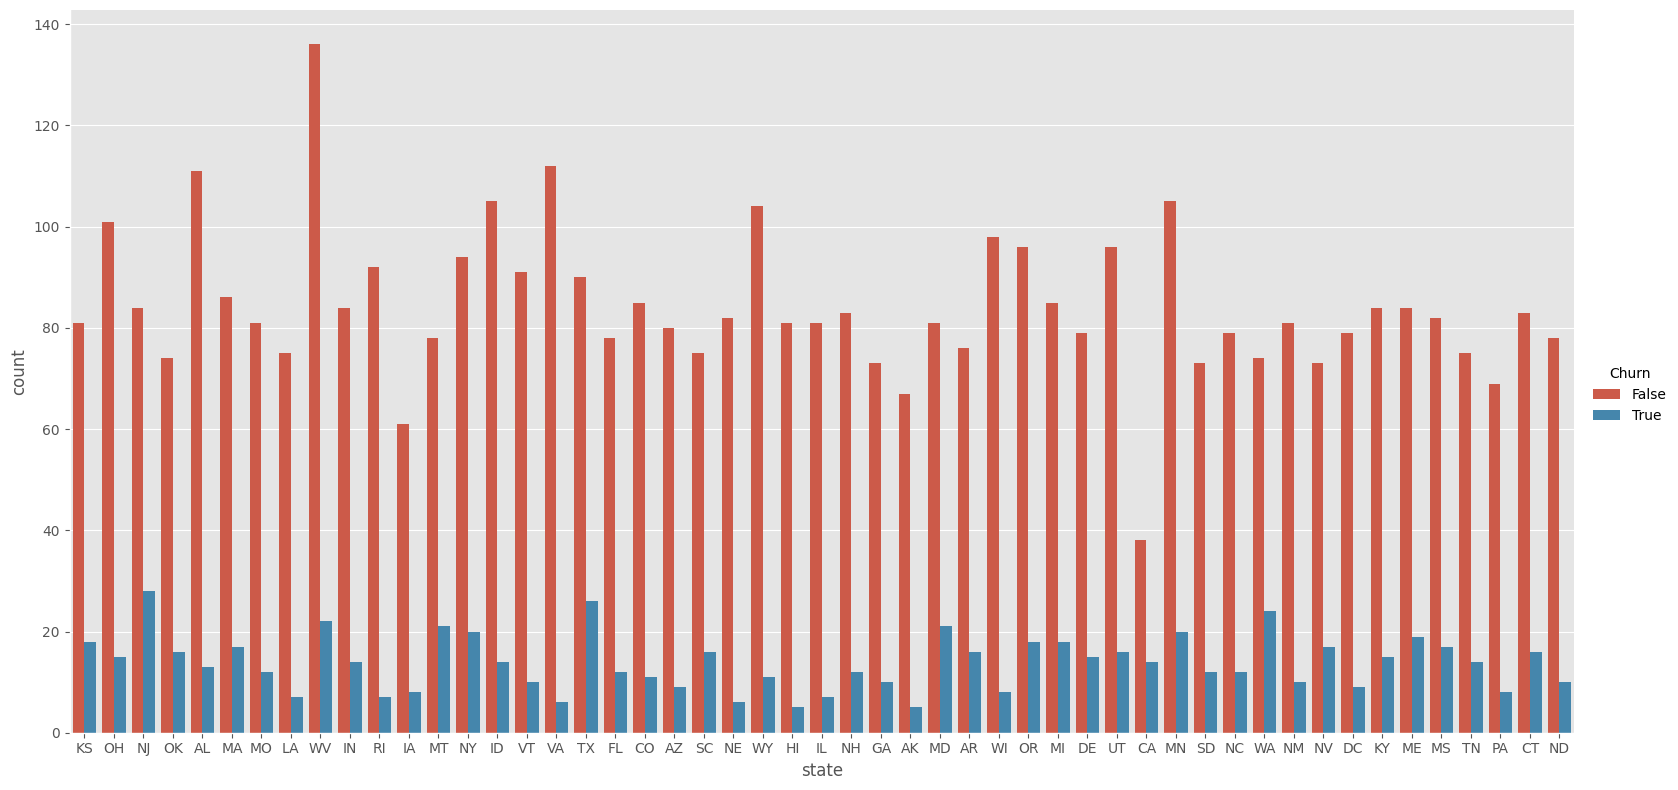

In [19]:
''' Let's visualize how the state may be related to the churn '''
sns.catplot(x = 'state', kind = 'count', hue='Churn', data = df, height=8 , aspect=2);   

Almost half of the customers in 'CA' state have left the service.

After that, the most riskful state (in terms of clients leaving) are  'WA' and 'NJ'.

In the other hand, some of the states with the best staying ratios are 'WV' , 'HI' , 'IL' , 'RI' and 'AK'

### 2.5 Analysing the international plan variable

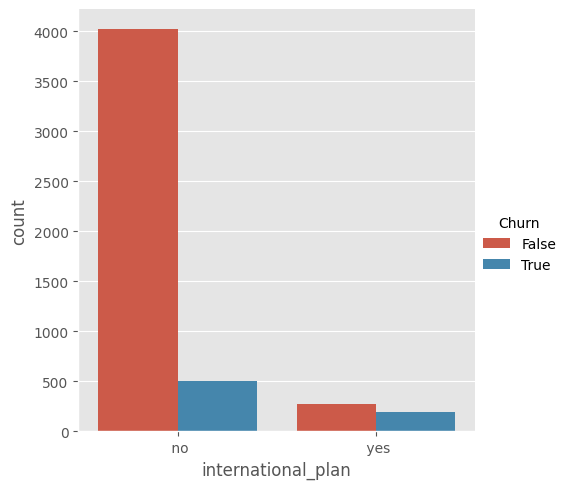

In [20]:
sns.catplot(x = 'international_plan', kind = 'count', hue='Churn', data = df);   

Now this is great information, there is a clear tendency to leave the service in clients that have the international plan. Almost all of them leave.

On the flip side, only 8% of the clients withiout international service leave.

### 2.6 Analysing the customer service calls

Customer service calls are usually made when something is not working, for leaving, or just to complain (and potentially leaving). This could be a great indicator for the Churn.

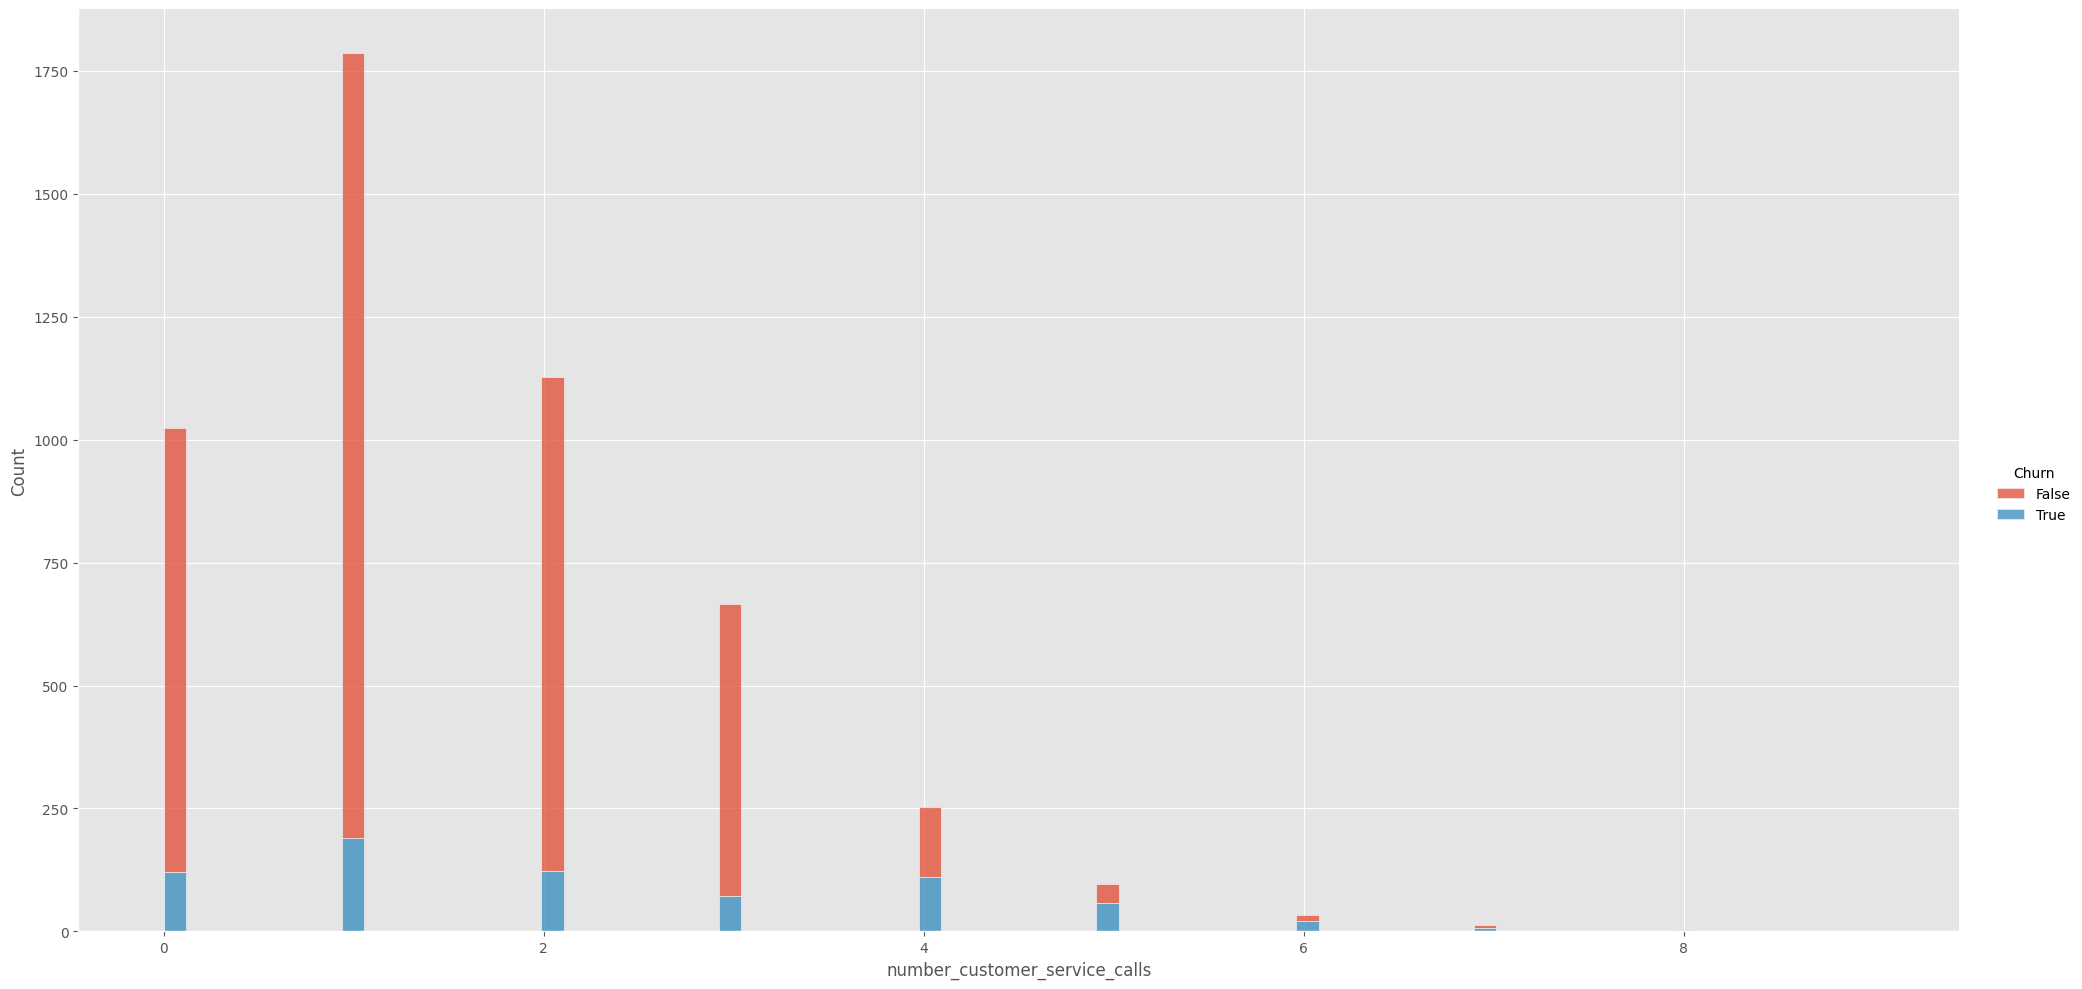

In [21]:
''' Graphics: number_customer_service_calls  '''

sns.displot(data=df, x = 'number_customer_service_calls', hue='Churn', multiple='stack', height=10 , aspect=2); 

Whe a customers makes 4 or more calls to the customer service, the probability that it is potentially leaving skyrockets up to 50% or more for the most extreme cases.

In [22]:
df[df['number_customer_service_calls'] > 7].value_counts()

state  area_code  phone_number  international_plan  voice_mail_plan  number_vmail_messages  total_day_minutes  total_day_calls  total_day_charge  total_eve_minutes  total_eve_calls  total_eve_charge  total_night_minutes  total_night_calls  total_night_charge  total_intl_minutes  total_intl_calls  total_intl_charge  number_customer_service_calls  Churn
MN     415        416-2778      yes                 yes              20                     237.5              120              40.38             253.4              94               21.54             265.2                80                 11.93               14.2                3                 3.83               9                              True     1
NH     408        371-1727      no                  no               0                      150.6              125              25.60             169.1              126              14.37             221.2                104                9.95                10.4                8      

Along with the prior bars chart we can observe that There are only 4 customers that made moer than 7 calls to the customer service, and 3 of them left. That is a big ratio.

In [23]:
Stay_7 = df[ (df['number_customer_service_calls'] == 7) & (df['Churn'] == True) ].shape[0]
Leave_7 = df[ (df['number_customer_service_calls'] == 7) &  (df['Churn'] == False) ].shape[0]

print("Stay: "+str(Stay_7)+ "      "+"Leave: "+str(Leave_7))        # For customers with exactly 7 calls to the service.


Stay: 7      Leave: 6


Also, among the customers that called 7 times, nearly 50% leave. That's a lot.

### 2.7 Analysing the voice mail plan

Just as happened with the international plan, the voice mail plan may have something to tell.

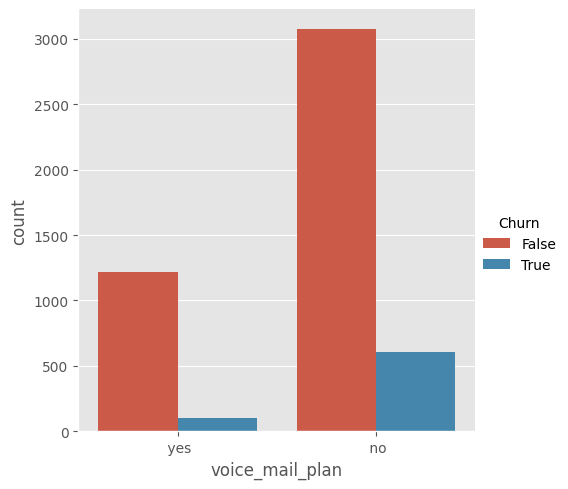

In [24]:
sns.catplot(x = 'voice_mail_plan', kind = 'count', hue='Churn', data = df);  

About 20% of the clients without the voice mail call off the service. For the ones with it, this ratio is only a 7.7%

In [25]:
df['voice_mail_plan'].unique()

array([' yes', ' no'], dtype=object)

In [26]:
# Calculating the ratio:
df[ (df['voice_mail_plan'] == ' yes') & (df['Churn'] == True) ].shape[0]

102

In [27]:
df[ (df['voice_mail_plan'] == ' yes') ].shape[0]

1323

In [28]:
102/1323*100

7.709750566893423

In [29]:
df.head()

,state,area_code,phone_number,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn
0,KS,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### 2.8 Analysing *number_vmail_messages*

In last place, let's see if this is useful

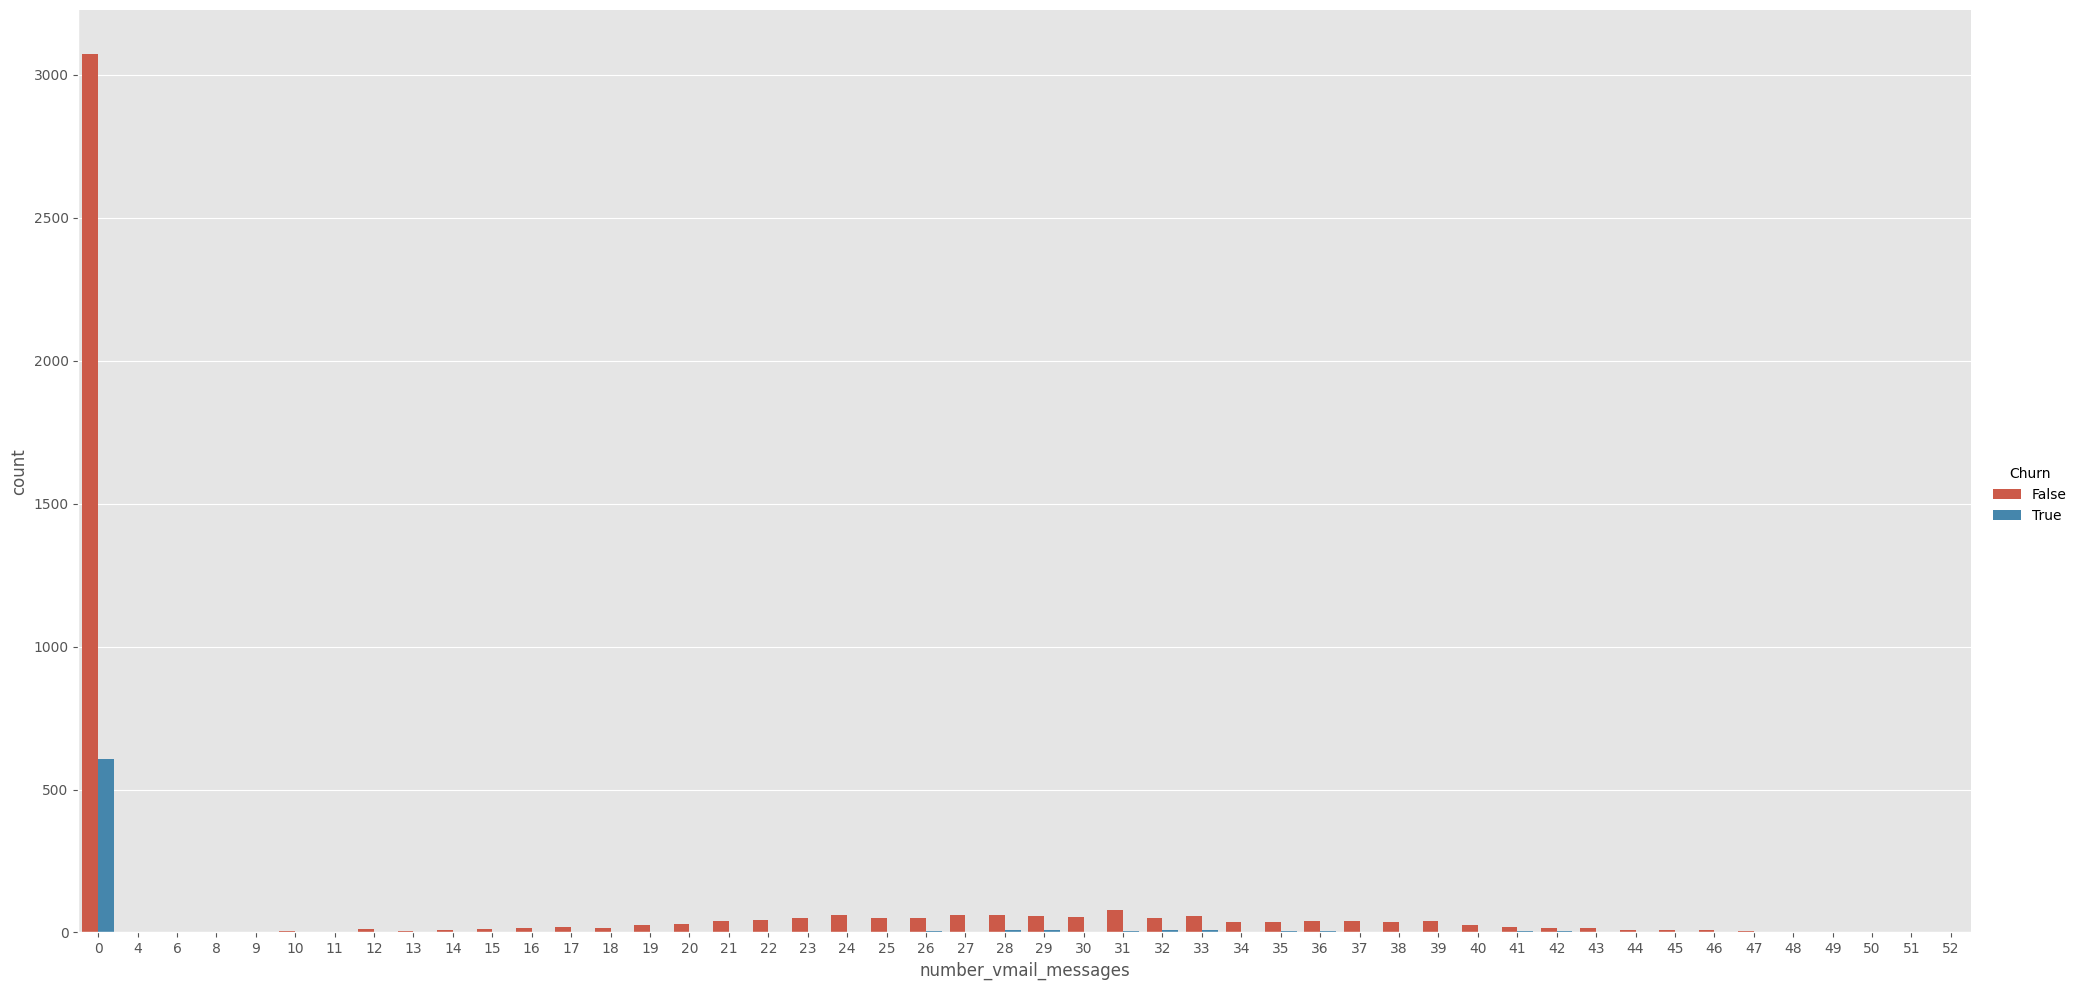

In [30]:
sns.catplot(x = 'number_vmail_messages', kind = 'count', hue='Churn', data = df, height=10 , aspect=2);  

The first thing to notice here is that very few clients actually use voicemail. Those who use it do not seem to be cancelling the service. Almost all cancelations come from the big group of "voice mail avoiders".

### 2.9 Analysing international related features

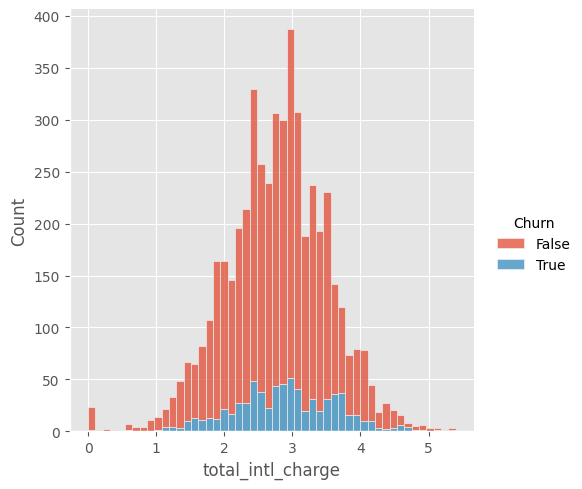

In [31]:
''' Graphics: total_intl_charge  '''

sns.displot(data=df, x = 'total_intl_charge', hue='Churn', multiple='stack');

Most (about 90%) of the leaves come from the customers that are charged 1.5 - 4 in international calls

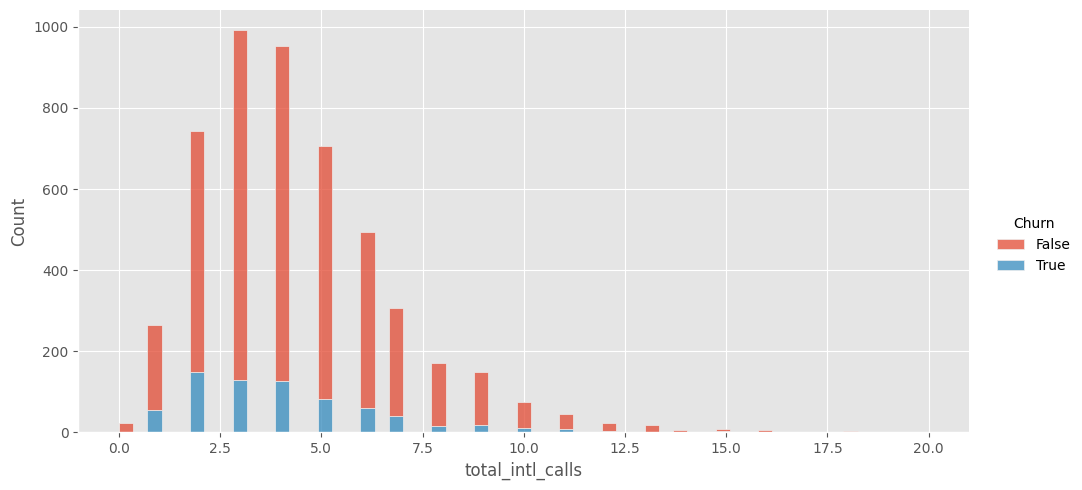

In [32]:
''' Graphics: total_intl_calls '''

sns.displot(data=df, x = 'total_intl_calls', hue='Churn', multiple='stack', height=5 , aspect = 2);

Making 1 to 10 international calls is associated with having a positive probability of leaving. Specially restricting aourselves to 1 to 6 calls

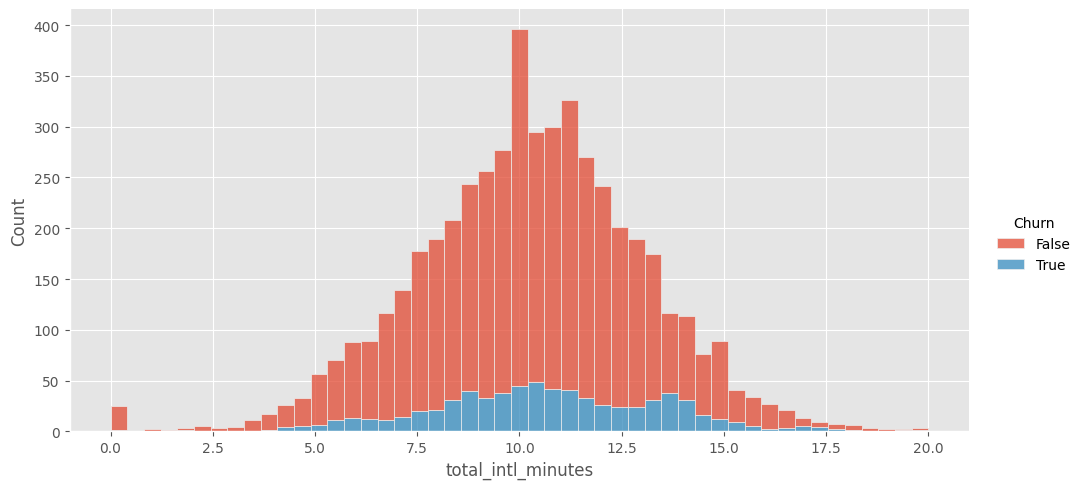

In [33]:
''' Graphics: total_intl_minutes '''

sns.displot(data=df, x = 'total_intl_minutes', hue='Churn', multiple='stack', height=5 , aspect = 2);

This shows that positive chrun is associated with the 5-15 min interval in international calls.

### 2.10 Overall conclusions

When trying to identify a potential leave of a customer we should pay attention to:

1. Whether that client is in the 18-35$ or 37-48$ morning charges range
2. Whether that client makes between 70 and 130 calls in the mornings
3. Whether that client calls for more than 100 minutes in the mornings

4. Whether that client is in the 12-24$ evening charges range
5. Whether that client makes between 60 and 130 calls in the evenings
6. Whether that client calls for 110 - 310 minutes in the evenings

7. Whether that client is in the 9-27$ night charges range
8. Whether that client makes between 60 and 130 calls in the nights
9. Whether that client calls for 110 - 310 minutes in the nights

10. Whether that client belongs to the CA, WA or NJ states

11. Whether that client has the international plan (special focus on this!)
12. Whether that client has made 4 or more calls to the customer service
13. Whether that client has voice mail plan (less determining than international plan)
14. Whether that client makes no use of the voicemail (If it uses, it will surely stay!)
15. Whether the client is caharged more than 1.5 and less than 4.1 for international calls
16. Whether the client makes from 1 to 6 international calls
17. Whether the client accumulates a 5-15 min duration os international calls



When trying to identify a loyal customer we should pay attention to:

1. Whether that client does not have the international plan
2. Belongs to the states WV, HI, IL, RI, or AK
3. Does not meet most of the previous 17 conditions

We can conclude that the most significant variables for the model will be 

## 3. Data cleaning

Now it's time to look for null values in the dataframe, make imputations, grouping columns, etc.

### 3.1 Creating a categorical variable for grouping consumers into two consumption levels

The reasonable way to classify a customer's consumption level is to tell if that customer's consume metrics are extreme in any of the fields related to number of calls, duration of the calls, and voice mesages. That is, we'll say that a customer's consume is extreme (extremely high or extremely low) if its metric of consume in any numerical variable is under the percentile 0.2 or 
above the percentile 0.8 of the (apparently) normal distribution that the data follows.

Something that would make this task easier is to join the splitted measurements of *charges*, *number of calls* and *accumulative minutes of calling duration*. A reason to go for this approach is that higher charges are usually related to a more intensive use of the service, and one client could be an *outstanding overall user* just by making a lot of calls during the night for example.

In [34]:
df2 = df.copy()     # We make a copy of the data frame


def variable_type_list(dataset, target):
  ''' This funcions is designed to return 3 lists of variables of the dataset, accoding to their variable type and avoiding the target variable '''

  # Empty lists for appending variables
  lista_numericas = []
  lista_categoricas = []
  lista_booleanas = []

  for col in dataset:
    # If a numeric variable takes more than 2 values we add it to the numeric list
    if (dataset[col].dtype.kind == 'f' or dataset[col].dtype.kind == 'i') and len(dataset[col].unique())!=2 and (col not in target):
      lista_numericas.append(col)

    # If a numeric variable takes only 2 values we add it to the booelan list
    if (dataset[col].dtype.kind == 'f' or dataset[col].dtype.kind == 'i') and len(dataset[col].unique())==2 and (col not in target):
      lista_booleanas.append(col)

    # If an object variable takes mor than 2 values we add it to the numeric list
    if(dataset[col].dtype.kind=='O') and (col not in target):
      lista_categoricas.append(col)

  return lista_numericas, lista_categoricas, lista_booleanas


num_vars , cat_vars , bool_vars = variable_type_list(df2 , 'Churn')
num_vars

['area_code',
 'number_vmail_messages',
 'total_day_minutes',
 'total_day_calls',
 'total_day_charge',
 'total_eve_minutes',
 'total_eve_calls',
 'total_eve_charge',
 'total_night_minutes',
 'total_night_calls',
 'total_night_charge',
 'total_intl_minutes',
 'total_intl_calls',
 'total_intl_charge',
 'number_customer_service_calls']

In [35]:
df2['total_charges'] = df2['total_day_charge'] + df2['total_eve_charge'] + df2['total_night_charge']      # Add total charge along the day, evening and night for each client 
df2['total_calls'] = df2['total_day_calls'] + df2['total_eve_calls'] + df2['total_night_calls']           # Add total calls along the day, evening and night for each client 
df2['total_minutes'] = df2['total_day_minutes'] + df2['total_eve_minutes'] + df2['total_night_minutes']   # Add total minutes of call along day, evening and night for each client

In [36]:
df2[['total_charges','total_day_charge','total_eve_charge','total_night_charge']]   # Checking that the transformation was made correctly

,total_charges,total_day_charge,total_eve_charge,total_night_charge
0,72.86,45.07,16.78,11.01
1,55.54,27.47,16.62,11.45
2,59.00,41.38,10.30,7.32
3,65.02,50.90,5.26,8.86
4,49.36,28.34,12.61,8.41
...,...,...,...,...
4995,72.42,40.07,18.96,13.39
4996,62.75,31.31,21.83,9.61
4997,48.15,23.90,14.69,9.56
4998,56.79,32.10,14.59,10.10


In [37]:
df2[['total_calls','total_day_calls','total_eve_calls','total_night_calls']]   # Checking that the transformation was made correctly

,total_calls,total_day_calls,total_eve_calls,total_night_calls
0,300,110,99,91
1,329,123,103,103
2,328,114,110,104
3,248,71,88,89
4,356,113,122,121
...,...,...,...,...
4995,369,127,126,116
4996,276,90,73,113
4997,314,89,128,97
4998,248,67,92,89


In [38]:
df2[['total_minutes','total_day_minutes','total_eve_minutes','total_night_minutes']]   # Checking that the transformation was made correctly

,total_minutes,total_day_minutes,total_eve_minutes,total_night_minutes
0,707.2,265.1,197.4,244.7
1,611.5,161.6,195.5,254.4
2,527.2,243.4,121.2,162.6
3,558.2,299.4,61.9,196.9
4,501.9,166.7,148.3,186.9
...,...,...,...,...
4995,756.2,235.7,223.0,297.5
4996,654.6,184.2,256.8,213.6
4997,525.8,140.6,172.8,212.4
4998,584.9,188.8,171.7,224.4


In [39]:
bool(True+True+False)

True

In [40]:
''' Let' create the new categorical column that divides customers into 2 consumption styles  '''

for col in ['total_minutes', 'total_calls', 'total_intl_calls', 'total_intl_minutes', 'number_vmail_messages']:
    filter = (df2[col].rank(pct = True) < 0.2) | (df2[col].rank(pct = True) > 0.8)  # Stablishing a filter to select True or False (1 or 0) values for the new column
    df2[f'{col}_percentile'] = np.where(filter, 1, 0) 


sum = pd.Series(np.zeros(df2.shape[0]))
for col in ['total_minutes', 'total_calls', 'total_intl_calls', 'total_intl_minutes', 'number_vmail_messages']:
    sum += df2[f'{col}_percentile']
df2['Extreme_consumption_profile'] = sum.astype(bool)

In [41]:
df2['Extreme_consumption_profile']  # It worked

0        True
1        True
2       False
3        True
4        True
        ...  
4995     True
4996     True
4997     True
4998     True
4999     True
Name: Extreme_consumption_profile, Length: 5000, dtype: bool

### 3.2 Looking for NULL values

In [42]:
# There are no NULL values, so no imputation is needed:
df2.isnull().sum()

state                               0
area_code                           0
phone_number                        0
international_plan                  0
voice_mail_plan                     0
number_vmail_messages               0
total_day_minutes                   0
total_day_calls                     0
total_day_charge                    0
total_eve_minutes                   0
total_eve_calls                     0
total_eve_charge                    0
total_night_minutes                 0
total_night_calls                   0
total_night_charge                  0
total_intl_minutes                  0
total_intl_calls                    0
total_intl_charge                   0
number_customer_service_calls       0
Churn                               0
total_charges                       0
total_calls                         0
total_minutes                       0
total_minutes_percentile            0
total_calls_percentile              0
total_intl_calls_percentile         0
total_intl_m

### 3.3 Columns exploration

In [43]:
# For numerical columns
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
area_code,5000.0,436.911400,42.209182,408.00,408.0000,415.00,415.0000,510.00
number_vmail_messages,5000.0,7.755200,13.546393,0.00,0.0000,0.00,17.0000,52.00
total_day_minutes,5000.0,180.288900,53.894699,0.00,143.7000,180.10,216.2000,351.50
total_day_calls,5000.0,119.834000,442.739543,0.00,87.0000,100.00,113.0000,9999.00
total_day_charge,5000.0,30.649668,9.162069,0.00,24.4300,30.62,36.7500,59.76
total_eve_minutes,5000.0,200.636560,50.551309,0.00,166.3750,201.00,234.1000,363.70
total_eve_calls,5000.0,100.191000,19.826496,0.00,87.0000,100.00,114.0000,170.00
total_eve_charge,5000.0,17.054322,4.296843,0.00,14.1400,17.09,19.9000,30.91
total_night_minutes,5000.0,200.391620,50.527789,0.00,166.9000,200.40,234.7000,395.00
total_night_calls,5000.0,99.919200,19.958686,0.00,87.0000,100.00,113.0000,175.00


Here we can see that the *area_code* variable has numerical type. It should be parsed into categorical.

In [44]:
# For categorical columns
df2.describe(exclude=np.number).T

,count,unique,top,freq
state,5000,51,WV,158
phone_number,5000,5000,382-4657,1
international_plan,5000,2,no,4527
voice_mail_plan,5000,2,no,3677
Churn,5000,2,False,4293
Extreme_consumption_profile,5000,2,True,4485


So far, we can extract some things to do to improve the dataset in order to apply the models:

1. We could use the *phone_number* column as an index for the data frame. It has no information.
2. Parsing *area_code* to categorical.
3. We should convert categoricals as ' yes' , ' no' or True , False to numeric 1 and 0 respectively (only for 4 columns: international_plan, voice_mail_plan, Churn, Extreme_consumption_profile)
4. Explore the correlation of variables respect to the target (Churn) to identify the most significative ones
5. We could apply one-hot encoding for the *state* column


### 3.4 Resetting the index

In [45]:
df2.set_index('phone_number' , inplace=True)
df2.head()

,state,area_code,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,...,Churn,total_charges,total_calls,total_minutes,total_minutes_percentile,total_calls_percentile,total_intl_calls_percentile,total_intl_minutes_percentile,number_vmail_messages_percentile,Extreme_consumption_profile
phone_number,,,,,,,,,,,,,,,,,,,,,
382-4657,KS,415,no,yes,25,265.1,110,45.07,197.4,99,...,False,72.86,300,707.2,1,0,0,0,1,True
371-7191,OH,415,no,yes,26,161.6,123,27.47,195.5,103,...,False,55.54,329,611.5,0,0,0,1,1,True
358-1921,NJ,415,no,no,0,243.4,114,41.38,121.2,110,...,False,59.00,328,527.2,0,0,0,0,0,False
375-9999,OH,408,yes,no,0,299.4,71,50.90,61.9,88,...,False,65.02,248,558.2,0,1,1,1,0,True
330-6626,OK,415,yes,no,0,166.7,113,28.34,148.3,122,...,False,49.36,356,501.9,1,1,0,0,0,True


### 3.5 Numerical to categorical

In [46]:
df2['area_code'] = df2['area_code'].astype(object)
df2['area_code'].dtype

dtype('O')

### 3.6 Converting boolean variables into numerical variables

In [47]:
df2['Churn'] = np.where(df2['Churn'] == False , 0 , 1)
df2['Extreme_consumption_profile'] = np.where(df2['Extreme_consumption_profile'] == False , 0 , 1)

df2['international_plan'] = np.where(df2['international_plan'] == ' no' , 0 , 1)
df2['voice_mail_plan'] = np.where(df2['voice_mail_plan'] == ' no' , 0 , 1)

df2.info()  # Checking that the changes were succesfully applied

<class 'pandas.core.frame.DataFrame'>
Index: 5000 entries,  382-4657 to  373-8058
Data columns (total 28 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   state                             5000 non-null   object 
 1   area_code                         5000 non-null   object 
 2   international_plan                5000 non-null   int32  
 3   voice_mail_plan                   5000 non-null   int32  
 4   number_vmail_messages             5000 non-null   int64  
 5   total_day_minutes                 5000 non-null   float64
 6   total_day_calls                   5000 non-null   int64  
 7   total_day_charge                  5000 non-null   float64
 8   total_eve_minutes                 5000 non-null   float64
 9   total_eve_calls                   5000 non-null   int64  
 10  total_eve_charge                  5000 non-null   float64
 11  total_night_minutes               5000 non-null   float64
 12

### 3.7 Significance of variables

In [48]:
df2['Churn'].mean()

0.1414

In [49]:
# For categorical variables:


def explore_cat_values(dataframe, column, target_column):

  # A table with number of rows, Churn=1 values and Churn=1 pecentage. 
  analysis_df = dataframe.pivot_table(index=column, values= target_column, aggfunc=[len, "sum", "mean"])

  # Setting the columns names
  analysis_df.columns = ['n_rows', 'Churn=1_values', 'Churn=1_pecentage']

  # Percentage of rows of each category
  analysis_df['pct_rows']= dataframe[column].value_counts(dropna = False, normalize = True)

  # Ordering columns and sorting values
  analysis_df = analysis_df[['n_rows','pct_rows', 'Churn=1_values', 'Churn=1_pecentage']].sort_values('n_rows', ascending = False)


  return analysis_df



In [50]:
explore_cat_values(df2,'area_code','Churn')

,n_rows,pct_rows,Churn=1_values,Churn=1_pecentage
area_code,,,,
415,2495,0.4990,346,0.138677
408,1259,0.2518,177,0.140588
510,1246,0.2492,184,0.147673


As the Churn percentage seems to be quite stationary between the categories of the *area_code* variable, we can conclude that this variable won't be significant enough for the model

In [51]:
explore_cat_values(df2 , 'state' , 'Churn')

,n_rows,pct_rows,Churn=1_values,Churn=1_pecentage
state,,,,
WV,158,0.0316,22,0.139241
MN,125,0.0250,20,0.160000
AL,124,0.0248,13,0.104839
ID,119,0.0238,14,0.117647
VA,118,0.0236,6,0.050847
OH,116,0.0232,15,0.129310
TX,116,0.0232,26,0.224138
WY,115,0.0230,11,0.095652
OR,114,0.0228,18,0.157895


According to this analysis, we can observe that the percentage of Churn grouped by the *state* category widely varies between categories. 

This is an indicator that this *state* variable may be significant for the model. 

In [52]:
# pip install Jinja2


# For the next graphic

In [53]:
# For numerical values, we use the correlation between the variable and the target. Let's use the corrrelations matrix:

corr_matrix = df2.corr(numeric_only=True)
corr_matrix.style.background_gradient(cmap='coolwarm')

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,total_night_calls,total_night_charge,total_intl_minutes,total_intl_calls,total_intl_charge,number_customer_service_calls,Churn,total_charges,total_calls,total_minutes,total_minutes_percentile,total_calls_percentile,total_intl_calls_percentile,total_intl_minutes_percentile,number_vmail_messages_percentile,Extreme_consumption_profile
international_plan,1.000000,0.009054,0.011947,0.028138,0.016518,0.028141,0.021235,0.002505,0.021234,-0.026508,0.005623,-0.026510,0.031799,0.004493,0.031751,-0.012974,0.259123,0.027932,0.016863,0.014039,-0.001542,0.015742,-0.006209,-0.021966,0.008135,-0.014121
voice_mail_plan,0.009054,1.000000,0.954508,0.002059,0.013708,0.002056,0.023328,-0.005916,0.023332,0.005524,0.009176,0.005522,0.004116,-0.007525,0.004165,-0.014453,-0.110698,0.012733,0.013840,0.017619,0.012092,-0.005862,-0.007104,0.009914,0.842407,0.143597
number_vmail_messages,0.011947,0.954508,1.000000,0.005381,0.012122,0.005377,0.019490,-0.003954,0.019496,0.005541,0.002676,0.005535,0.002463,0.000124,0.002505,-0.007086,-0.097633,0.014084,0.012051,0.017461,0.014871,-0.010928,-0.006760,0.005706,0.919802,0.157679
total_day_minutes,0.028138,0.002059,0.005381,1.000000,0.017729,1.000000,-0.010750,0.008128,-0.010760,0.011799,0.004236,0.011783,-0.019486,-0.001303,-0.019415,0.002733,0.207705,0.884285,0.018261,0.605661,0.022624,0.017254,0.015285,0.014578,-0.000055,0.018243
total_day_calls,0.016518,0.013708,0.012122,0.017729,1.000000,0.017727,0.012695,-0.025782,0.012691,0.021450,0.009022,0.021432,0.000755,0.023552,0.000733,-0.006298,-0.017432,0.025697,0.998012,0.030100,0.000630,0.054862,0.002017,-0.010002,0.000045,0.015106
total_day_charge,0.028141,0.002056,0.005377,1.000000,0.017727,1.000000,-0.010747,0.008129,-0.010757,0.011801,0.004235,0.011785,-0.019490,-0.001307,-0.019419,0.002726,0.207700,0.884287,0.018260,0.605664,0.022619,0.017255,0.015278,0.014580,-0.000058,0.018244
total_eve_minutes,0.021235,0.023328,0.019490,-0.010750,0.012695,-0.010747,1.000000,0.002763,1.000000,-0.016639,0.013420,-0.016642,0.000137,0.008388,0.000159,-0.013823,0.089288,0.402411,0.013407,0.551590,-0.018036,-0.011638,0.019189,-0.000492,0.023394,-0.014323
total_eve_calls,0.002505,-0.005916,-0.003954,0.008128,-0.025782,0.008129,0.002763,1.000000,0.002778,0.001781,-0.013682,0.001799,-0.007458,0.005574,-0.007507,0.006235,-0.006284,0.008754,0.018360,0.007497,-0.003847,0.001444,0.008122,-0.015875,-0.006598,-0.015056
total_eve_charge,0.021234,0.023332,0.019496,-0.010760,0.012691,-0.010757,1.000000,0.002778,1.000000,-0.016649,0.013422,-0.016652,0.000132,0.008393,0.000155,-0.013836,0.089282,0.402401,0.013404,0.551578,-0.018025,-0.011652,0.019188,-0.000489,0.023397,-0.014309
total_night_minutes,-0.026508,0.005524,0.005541,0.011799,0.021450,0.011801,-0.016639,0.001781,-0.016649,1.000000,0.026972,0.999999,-0.006721,-0.017214,-0.006655,-0.008533,0.045677,0.223459,0.022718,0.564965,0.003313,0.017030,0.009325,0.009938,0.010823,0.001729


Form this graphic of the correlations matrix, we can tell that there is some correlation between the variables *international_plan*, *total_day_minutes*, *total_day_charge*, *number_customer_service_calls*, *total_charges*, *total_minutes*, *total_minutes_percentile*.

This confirms the previous conclusions after the graphic anlysis of the variables, just at the end of section 2.

### 3.8 One-hot encoding of the categorical variables

In [54]:
df3 = pd.get_dummies(data = df2,columns = ['state' ,'area_code'], dtype = int)
df3.head()  # It worked

,international_plan,voice_mail_plan,number_vmail_messages,total_day_minutes,total_day_calls,total_day_charge,total_eve_minutes,total_eve_calls,total_eve_charge,total_night_minutes,...,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,area_code_408,area_code_415,area_code_510
phone_number,,,,,,,,,,,,,,,,,,,,,
382-4657,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,1,0
371-7191,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,1,0
358-1921,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,1,0
375-9999,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,1,0,0
330-6626,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


Finally, our data is celan and ready for modelling

### Additional plots

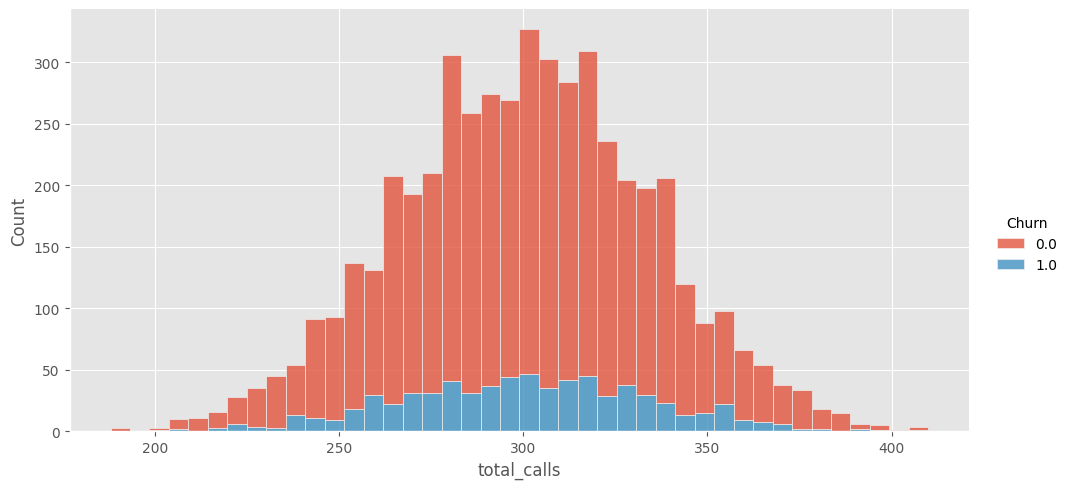

In [55]:
''' Graphics: total_calls '''
df_drop = df2.where(df2['total_calls'] < 6000)
sns.displot(data=df_drop, x = 'total_calls', hue='Churn', multiple='stack', height=5 , aspect = 2);

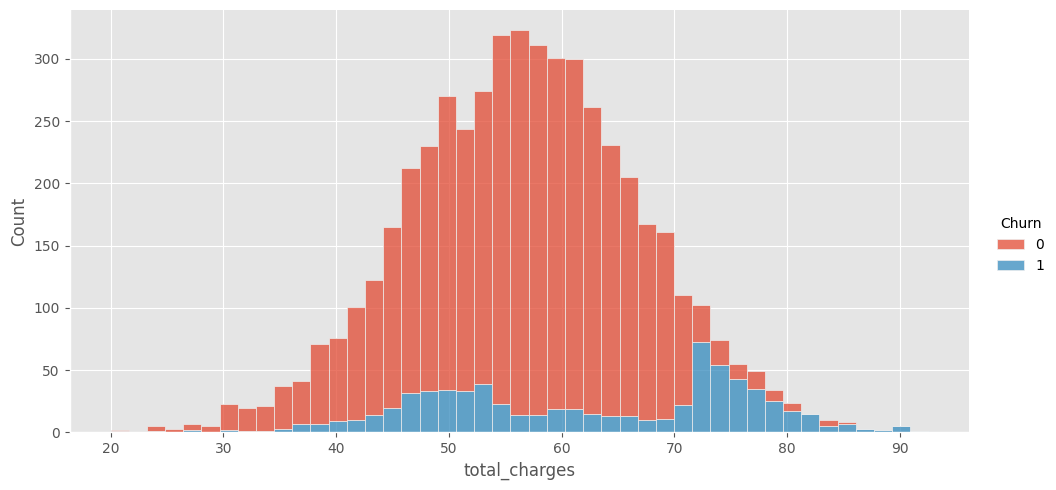

In [56]:
''' Graphics: total_charges '''
sns.displot(data=df2, x = 'total_charges', hue='Churn', multiple='stack', height=5 , aspect = 2);

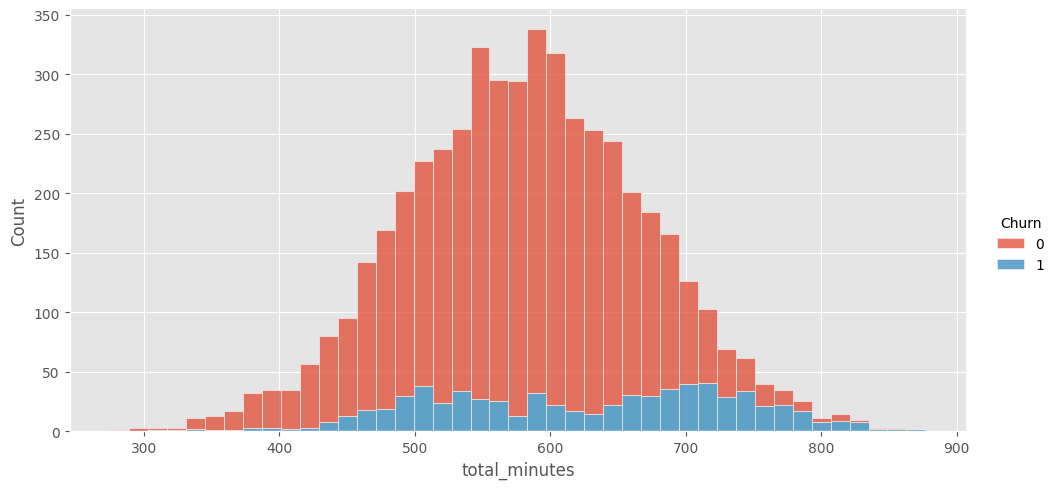

In [57]:
''' Graphics: total_minutes '''
sns.displot(data=df2, x = 'total_minutes', hue='Churn', multiple='stack', height=5 , aspect = 2);

## 4. Building classification ML models

### 4.1 Validation set

Unfortunately, the data volume is too low for taking a validation dataset so we need to omit this step in this case. However, this is a good practice that helps evaluating the performance of the predictive models in real-life projects. Furthermore, we don't have additional data that could guide us in how to efficiently select this validation set

### 4.2 Train/Test split

In [58]:
# Train/Test split:
X = df3.drop('Churn',axis='columns')    # Input data for the model
y = df3['Churn']                        # Output data ('Churn')

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)   # We use 80% of the data to train and 20% for the evaluation of the model

help(train_test_split)

Help on function train_test_split in module sklearn.model_selection._split:

train_test_split(*arrays, test_size=None, train_size=None, random_state=None, shuffle=True, stratify=None)
    Split arrays or matrices into random train and test subsets.
    
    Quick utility that wraps input validation,
    ``next(ShuffleSplit().split(X, y))``, and application to input data
    into a single call for splitting (and optionally subsampling) data into a
    one-liner.
    
    Read more in the :ref:`User Guide <cross_validation>`.
    
    Parameters
    ----------
    *arrays : sequence of indexables with same length / shape[0]
        Allowed inputs are lists, numpy arrays, scipy-sparse
        matrices or pandas dataframes.
    
    test_size : float or int, default=None
        If float, should be between 0.0 and 1.0 and represent the proportion
        of the dataset to include in the test split. If int, represents the
        absolute number of test samples. If None, the value is set to

### 4.3 Model 1: Decission tree

In [59]:
''' In this case, we train the model without validation data. For the approach using decission trees is really important to control the overfitting by wisely choosing 
    the parameters of the model, in special 'max_depth'. '''

# Let's build several decission trees with different depths. We control the overfitting by looking at the scores of the model (train score and test score).
# This is a good valiadtion strategy to follow because it allows the model to get better while keeping an eye on overfitting (which kills the generalisation ability of the model).
# The criteria that we follow for this is that scores in train and test must be high but shouldn't differ in more than 1% for the same model.

for i in range(1,10):
  dt_overfit = DecisionTreeClassifier(max_depth = i, min_samples_leaf=50, random_state = 50)
  #dt_overfit = DecisionTreeClassifier(max_depth = i,min_samples_split=500, random_state = 50)
  dt_overfit.fit(X_train, y_train)
  train_acc = dt_overfit.score(X_train, y_train)
  test_acc = dt_overfit.score(X_test, y_test)
  print('Tree Depth: {}, Train accuracy: {}, Test accuracy: {}'.format(i, np.round(train_acc,4), np.round(test_acc,4) ))

Tree Depth: 1, Train accuracy: 0.8962, Test accuracy: 0.899
Tree Depth: 2, Train accuracy: 0.912, Test accuracy: 0.919
Tree Depth: 3, Train accuracy: 0.9438, Test accuracy: 0.949
Tree Depth: 4, Train accuracy: 0.959, Test accuracy: 0.961
Tree Depth: 5, Train accuracy: 0.972, Test accuracy: 0.972
Tree Depth: 6, Train accuracy: 0.972, Test accuracy: 0.972
Tree Depth: 7, Train accuracy: 0.972, Test accuracy: 0.972
Tree Depth: 8, Train accuracy: 0.972, Test accuracy: 0.972
Tree Depth: 9, Train accuracy: 0.972, Test accuracy: 0.972


We can observe that both train and test accuracys remain constant (and equal) form depth 5 onwards. This means thwo things:

1. +5-depth trees are good models because both scores are very similar (equal in this case) and ahve a high value (the higher, the beter it fits the data).
2. The fract that scores are similar is usually an indicator of low or nonexisting overfitting
3. We should choose the tree with depth 5 because it si simlper than the other well-working ones.

In [60]:
# We keep this tree:
DT_model = DecisionTreeClassifier(max_depth = 5, min_samples_leaf=50, random_state = 50)

In [61]:
''' Additionally, we can explore other metrics for the model, that evaluate it in different ways  '''

DT_model.fit(X_train, y_train)

top_features = pd.Series(DT_model.feature_importances_, index=X_train.columns).sort_values(ascending=False).head(10)
top_features    


total_charges                    0.489435
number_customer_service_calls    0.122976
number_vmail_messages            0.117041
total_intl_charge                0.105398
international_plan               0.082651
total_intl_calls                 0.080783
total_calls                      0.001559
total_night_minutes              0.000158
state_NY                         0.000000
state_NV                         0.000000
dtype: float64

We can observe that the most sgnificant variables for this model are the expected ones

In [62]:
# We elaborate predictions using the test data
y_test_pred = pd.DataFrame(DT_model.predict(X_test), index = y_test.index, columns =['Churn_prediction'])

# We add the predictions in a column in a new dataset
results_df = pd.concat([y_test,y_test_pred], axis=1)

In [63]:
# Using the confusion matrix to evaluate false positives and false negatives:

confusion_matrix = pd.crosstab(results_df['Churn'], results_df['Churn_prediction'])
confusion_matrix

Churn_prediction,0,1
Churn,,
0,863,4
1,24,109


The model works really well, but it has more errors when it predicts that a client won't leave the service.

Let's see what other metrics tell about how good it is.

In [64]:
# F1 score metric:
metrics.f1_score(y_test, y_test_pred) # = 0.88  is quite good for the F1 score. 

0.8861788617886179

In [65]:
# ROC curve and AUC metrics:


# DataFrame with prediction probabilities
y_score = pd.DataFrame(DT_model.predict_proba(X_test)[:,1], index = y_test.index, columns = ['ChurnScore'])

# Joining the previos DF with the results one
results_df = pd.concat([results_df,y_score], axis=1)

results_df.head(15)

,Churn,Churn_prediction,ChurnScore
phone_number,,,
418-6412,0,0,0.020628
408-1331,0,0,0.020628
342-4004,0,0,0.020628
410-1848,0,0,0.020628
333-9253,0,0,0.020628
420-6893,0,0,0.020628
343-1009,0,0,0.037975
392-6420,0,0,0.020628
421-6766,0,0,0.020628


In [66]:
# False Positive Rate, True Positive Rate and threshold:
fpr, tpr, th = metrics.roc_curve(results_df['Churn'], results_df['ChurnScore'])

Text(0, 0.5, 'TPR')

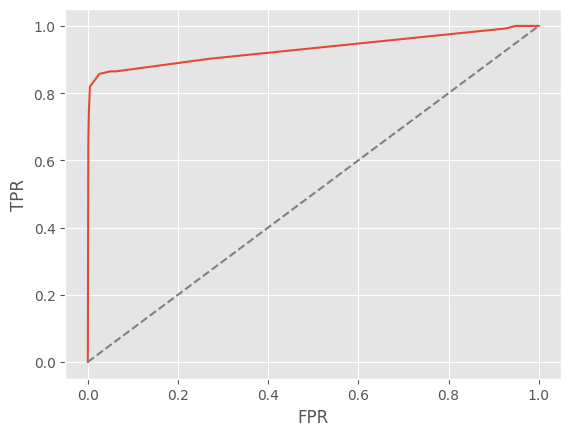

In [67]:
# Plotting the ROC curve:

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color='grey', linestyle ='--')
plt.xlabel('FPR')
plt.ylabel('TPR') 

In [68]:
# Computing the AUC:
metrics.roc_auc_score(results_df['Churn'], results_df['ChurnScore'])

0.9310603498365289

According to the AUC metric, the model is fabulous.

We can try some other model to see if this can get something even better, even though we may not. Let's try just for fun, using the AUC as our reference metric for evaluating the models.

### 4.4 Model 2: Random forest

In [69]:
RandomForestClassifier??

Init signature:
RandomForestClassifier(
    n_estimators=100,
    *,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None,
    monotonic_cst=None,
)
Source:        
class RandomForestClassifier(ForestClassifier):
    """
    A random forest classifier.

    A random forest is a meta estimator that fits a number of decision tree
    classifiers on various sub-samples of the dataset and uses averaging to
    improve the predictive accuracy and control over-fitting.
    Trees in the forest use the best split strategy, i.e. equivalent to passing
    `splitter="best"` to the underlying :class:`~sklearn.tree.DecisionTreeRegressor`.
    The sub-sample size is contr

In [70]:
# A check of overfitting:

for i in range(1,10):
  RF_overfit = RandomForestClassifier(n_estimators=3, max_depth=i, random_state=42)
  #dt_overfit = DecisionTreeClassifier(max_depth = i,min_samples_split=500, random_state = 50)
  RF_overfit.fit(X_train, y_train)
  train_acc = RF_overfit.score(X_train, y_train)
  test_acc = RF_overfit.score(X_test, y_test)
  print('Tree Depth: {}, Train accuracy: {}, Test accuracy: {}'.format(i, np.round(train_acc,4), np.round(test_acc,4) ))

Tree Depth: 1, Train accuracy: 0.8565, Test accuracy: 0.867
Tree Depth: 2, Train accuracy: 0.8685, Test accuracy: 0.874
Tree Depth: 3, Train accuracy: 0.882, Test accuracy: 0.889
Tree Depth: 4, Train accuracy: 0.8928, Test accuracy: 0.898
Tree Depth: 5, Train accuracy: 0.9272, Test accuracy: 0.927
Tree Depth: 6, Train accuracy: 0.9138, Test accuracy: 0.918
Tree Depth: 7, Train accuracy: 0.9435, Test accuracy: 0.948
Tree Depth: 8, Train accuracy: 0.9355, Test accuracy: 0.926
Tree Depth: 9, Train accuracy: 0.954, Test accuracy: 0.931


We should keep the one with depth 7

In [71]:
# Training of the RF mdoel:

RF_model = RandomForestClassifier(n_estimators=3, max_depth=7, random_state=42)
RF_model.fit(X=X_train , y=y_train)

RandomForestClassifier(max_depth=7, n_estimators=3, random_state=42)

In [72]:
# We elaborate predictions using the test data
y_test_pred = pd.DataFrame(RF_model.predict(X_test), index = y_test.index, columns =['Churn_prediction'])

# We add the predictions in a column in a new dataset
results_df_RF = pd.concat([y_test,y_test_pred], axis=1)

In [73]:
# ROC curve and AUC metrics:


# DataFrame with prediction probabilities
y_score = pd.DataFrame(RF_model.predict_proba(X_test)[:,1], index = y_test.index, columns = ['ChurnScore'])

# Joining the previos DF with the results one
results_df_RF = pd.concat([results_df_RF,y_score], axis=1)

results_df_RF.head(15)

,Churn,Churn_prediction,ChurnScore
phone_number,,,
418-6412,0,0,0.046099
408-1331,0,0,0.028541
342-4004,0,0,0.071504
410-1848,0,0,0.050998
333-9253,0,0,0.052109
420-6893,0,0,0.091451
343-1009,0,0,0.068338
392-6420,0,0,0.028426
421-6766,0,0,0.019898


In [74]:
# False Positive Rate, True Positive Rate and threshold
fpr, tpr, th = metrics.roc_curve(results_df_RF['Churn'], results_df_RF['ChurnScore'])

Text(0, 0.5, 'TPR')

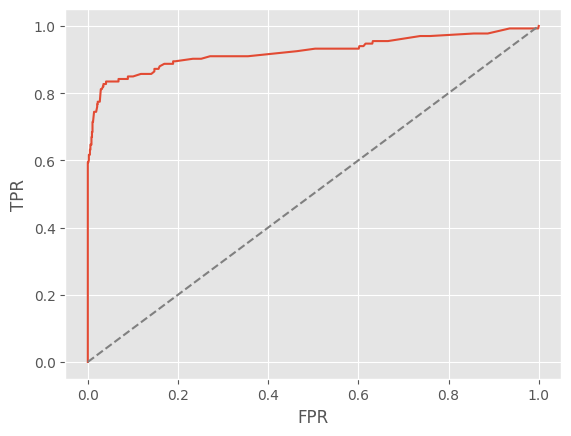

In [75]:
# Plotting the ROC curve:

plt.plot(fpr,tpr)
plt.plot([0,1], [0,1], color='grey', linestyle ='--')
plt.xlabel('FPR')
plt.ylabel('TPR')

In [76]:
# Computing the AUC score:
metrics.roc_auc_score(results_df_RF['Churn'], results_df_RF['ChurnScore'])

0.9232163453616739

AUC score is very similar to the one before, but that was a bit better

As the dataset was small and the data seem to be good to interpret by simple models, it is not worth it to try more complex models, since they may even provide worse results.

Nevertheless, with a bit of spare time, we could invest in trying to find the optimal configuration of the parameters of both models to try getting the best model possible with these tools.

For this time, we can settle down with the decission tree model, because it has the best AUC score.

# 5. Additional questions and summary

**QUESTION 1:**

*Discuss and analyze how each variable contributes to the churn rate according to the model. Which variables are the most impactful? How are they affecting the churn? Does it make sense?*

**ANSWER 1:**

As I said at the end of section 3, the correlation matrix for the numeric varaibles shows that the most significant ones are:

*international_plan*, *total_day_minutes*, *total_day_charge*, *number_customer_service_calls*, *total_charges*, *total_minutes*, *total_minutes_percentile*.

According to the prior analysis in section 1, this makes so much sense, because we saw that the graphics matched this information. Furthermore it is obvious, that according to the number of reasons why a client could cancel the service, everything related to the use that the client makes, the pricing and even the region can affect that decission. So that's why in same particular
cases it is interesting to add the *state* as a sgnificant model, just as we did at the end of section 1.

**QUESTION 2:**

*Imagine that you have now been informed that the Telcom Company is planning to carry out
commercial actions on a sample of 500 customers to avoid potential outflows. How would you
select the 500 customers that maximize the success and profitability of these actions?*

**ANSWER 2:**

If the company is trying to prevent clients for calling off the service by carrying out commercial actions, The best for the company would be to target those customers who are prone to leaving according to the model's predictions. If they don't have this model yet, they still could take a look at the varaibles in the previous question, along with the analysis I did in section 2, to realise that their campaing's focus should be clients that:

- don't use voicemail
- have international plan (this is the most important feature)
- are charged intermediate amounts of money 
- makes 1 to 6 international calls 
- belong to the states of CA, WA or NJ
- makes a decent amoun of calls 

all the conditions at once, just some of them, or separately.


## **Summary and conclusions of the work (for the company)**

Dear company staff,

After analysing the data that we've been provided, we've been able to build a classification model that can predict with high accuracy whether one of your clients is prone to
cancel the service that is receiving. Although the model work very well in general, one of the metrics used for the evaluation of the model showed that it is more reliable
when forecasting a client leaving the service than when forecasting a client staying with you.

This means that even though the model is not perfect (like almost every possible model) it works good enough to be used and when it says a customer is leaving the service it is highly reliable.
But, if it says that a customer is staying in the service, there is still room for doubts; even though te model will be right most of the times.

Apart from that, we've carried out a variable analysis that shows which clients are prone to stay with you, and which are likely to call out the service; according to their
consumption habits, services, and location. Here is a cheat sheet to identify both profiles of customer:

**When trying to identify a potential leave of a customer we should pay attention to:**

- Whether that client charges are intermedaite or high 
- Whether that client makes an intermediate amount of calls 
- Whether that client calls for more than than 100 minutes
- Whether that client belongs to the CA, WA or NJ states
- Whether that client has the international plan (special focus on this!)
- Whether that client has made 4 or more calls to the customer service
- Whether that client has voice mail plan (less determining than international plan)
- Whether that client makes no use of the voicemail (If it uses, it will surely stay!)




**When trying to identify a loyal customer we should pay attention to:**

- Whether that client may not have the international plan
- Belongs to the states WV, HI, IL, RI, or AK
- Does not meet most of the previous 8 conditions

I hope that everything is clear enough for you to take advantage of it. If any questions arise, I'll be more than pleased to help.